In [53]:

# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd

# Gráficos
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

#  Modelado y evaluación
# ------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#  Crossvalidation
# ------------------------------------------------------------------------------
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn import metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

En el pair programming de hoy debéis usar el csv que guardastéis cuando hicistéis el pairprgramming de codificicación (este csv debería tener las variables estadandarizas).

In [54]:
df=pd.read_csv('../datos/salarios_encoding_dum.csv', index_col=0)
df.head(2) #Hacemos una vista previa de nuestro DataFrame

salary_box  experience_levelmap_funcion  emp_resid_CA  emp_resid_ES  \
0  4631.904560                            1             0             0   
1  7311.922975                            2             0             0   

   emp_resid_FR  emp_resid_GB  emp_resid_IN  emp_resid_US  
0             0             0             0             1  
1             0             0             0             1

El objetivo de este pairprogramming es que hagáis vuestro primer modelo de machine learning. Para eso recordad que:

- Deberéis separar la X y la y.
- Deberéis crear el train y el test.
- Ajustar vuestro modelo.

In [55]:
x = df.drop("salary_box", axis = 1) #Variables predictoras
y = df["salary_box"] #Variable respuesta

In [56]:
# Separamos nuestras variables en test y train.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [57]:
# iniciamos la regresión lineal. n_jobs hace referencia al número de nucleos que usaremos de nuestro ordenador. 
# Al indicar -1 significa que los usaremos todos. 
lr = LinearRegression(n_jobs=-1)

In [58]:
# fiteamos el modelo, lo que significa que le pasamos los datos de entrenamiento para que aprenda el algoritmo. 
# Fijaros que para que aprenda, les paso solo los datos de entrenamiento

lr.fit(x_train, y_train)

LinearRegression(n_jobs=-1)

In [59]:
# es el momento de hacer las predicciones, para eso usarmos el método predict() de sklearn 

y_predict_train = lr.predict(x_train) # hacemos las predicciones para los salarios a predecir
y_predict_test = lr.predict(x_test) # hacemos las predicciones para los salarios que tenemos en los datos de test

In [60]:
train_df = pd.DataFrame({'Real': y_train, 'Predicted': y_predict_train, 'Set': ['Train']*len(y_train)})
test_df  = pd.DataFrame({'Real': y_test,  'Predicted': y_predict_test,  'Set': ['Test']*len(y_test)})
resultados = pd.concat([train_df,test_df], axis = 0)
resultados.head()

Real    Predicted    Set
109  11171.498346  8478.305073  Train
247   6421.646998  7487.738739  Train
234   3677.054839  3665.571643  Train
202   4860.617969  4090.734704  Train
78    9727.326344  6497.172405  Train

In [61]:
# Vamos a sacar los residuos para verlo más claramente
resultados['residuos'] = resultados['Real'] - resultados['Predicted']
resultados.head(10) 

Real    Predicted    Set     residuos
109  11171.498346  8478.305073  Train  2693.193273
247   6421.646998  7487.738739  Train -1066.091741
234   3677.054839  3665.571643  Train    11.483197
202   4860.617969  4090.734704  Train   769.883265
78    9727.326344  6497.172405  Train  3230.153939
147   8533.395515  7487.738739  Train  1045.656775
59    2674.723649  2240.411112  Train   434.312537
118   5460.900086  7487.738739  Train -2026.838653
6     3385.268560  4022.695527  Train  -637.426966
182   5801.135240  4952.598382  Train   848.536858

En vista de los primeros resultados tenemos unos residuos importantes en nuestro modelo, tanto sobreestimado como infraestimado. Veamos graficamente nuestro modelo pero podemos intuir que va a mal.

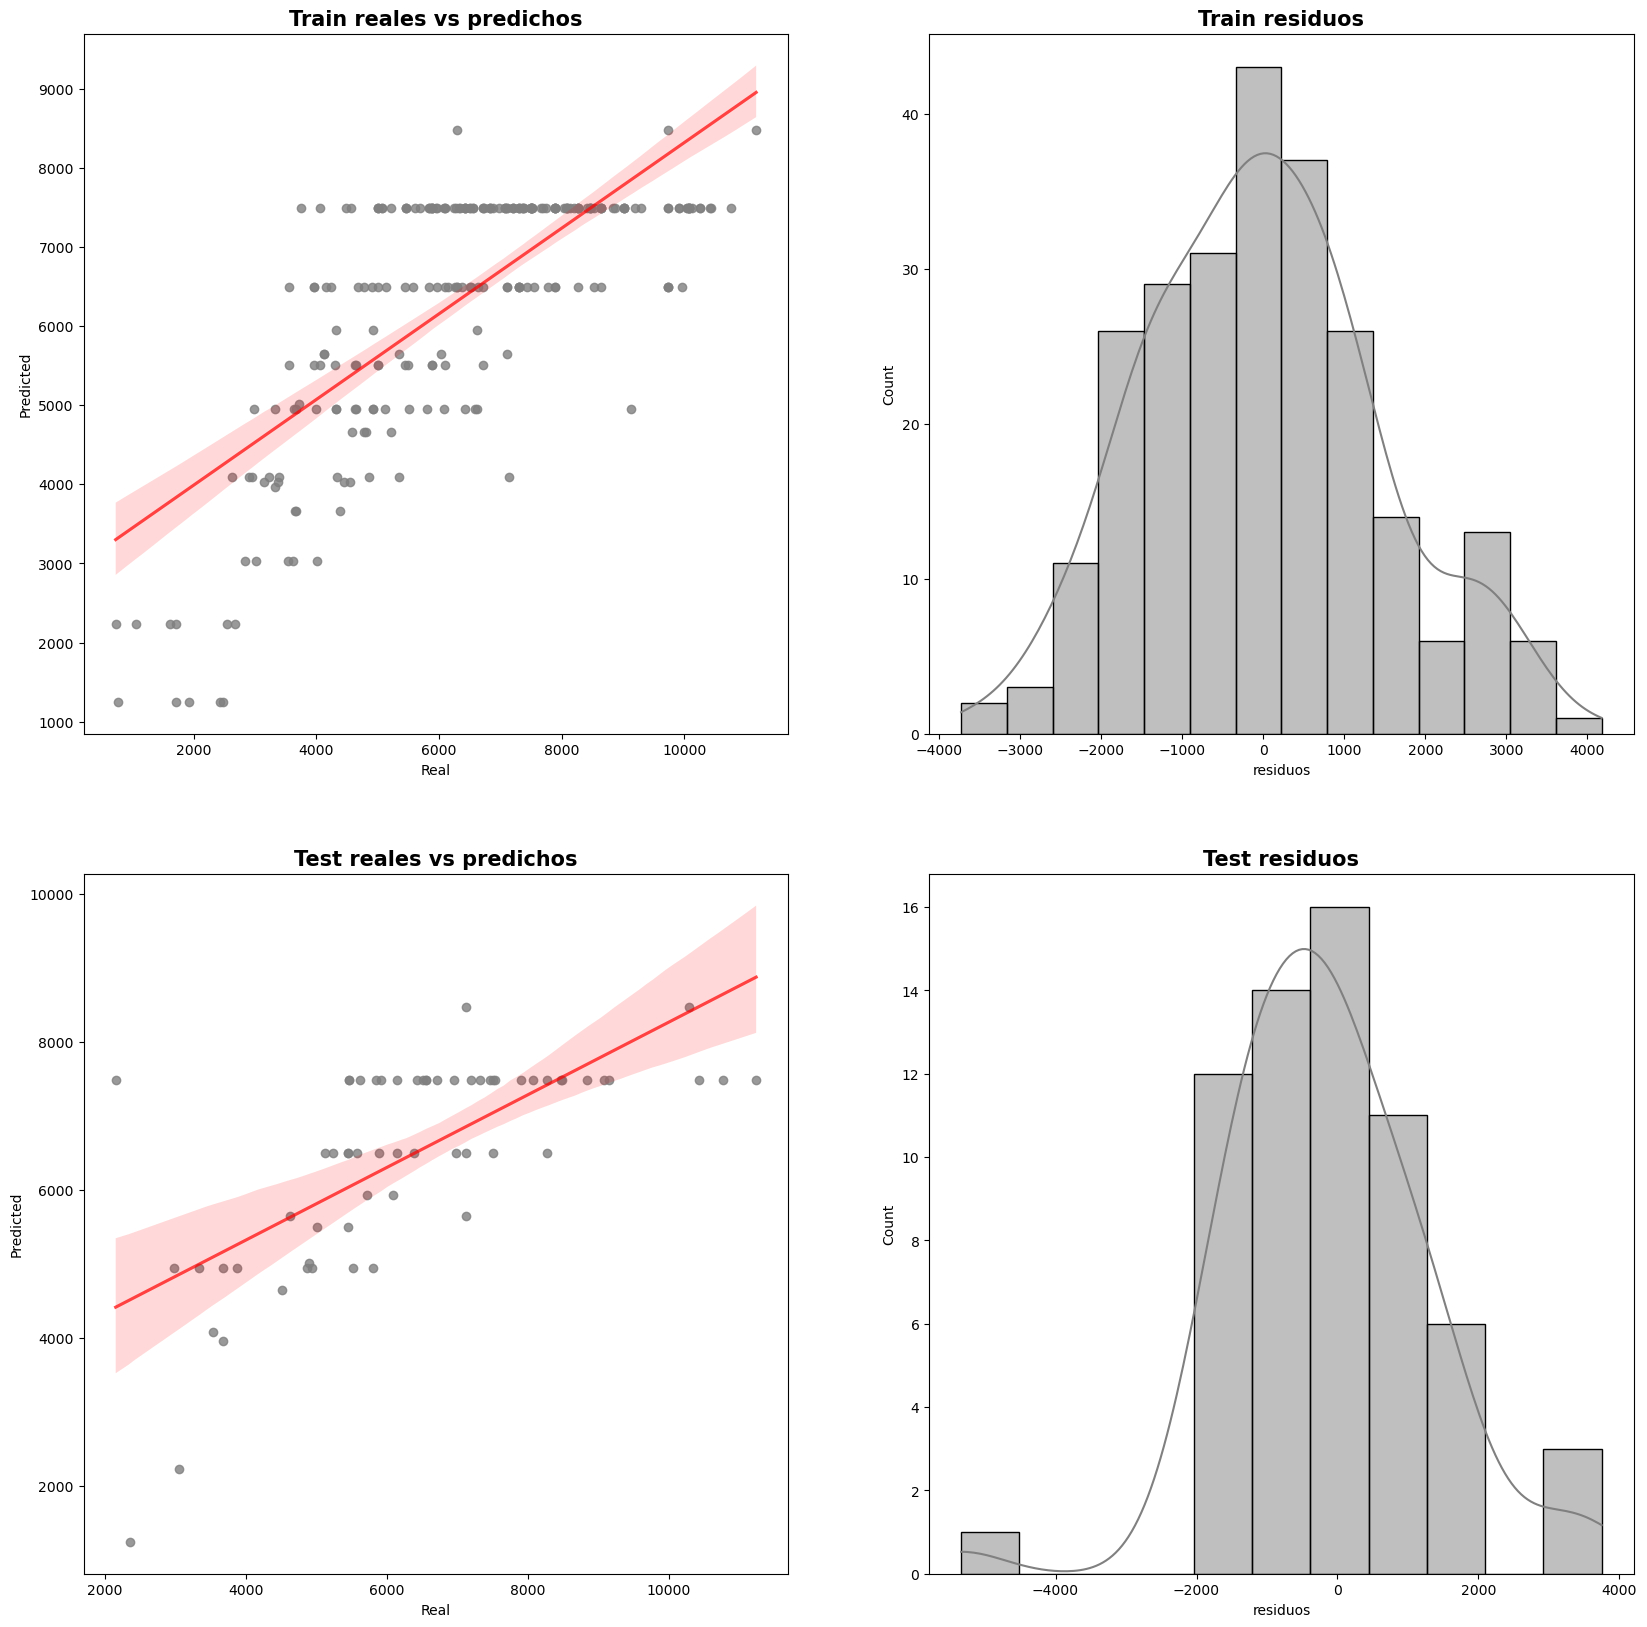

In [62]:
fig, ax = plt.subplots(2,2,figsize=(20,20))


# ploteamos los reales vs los predichos
sns.regplot(data = resultados[resultados['Set'] == "Train"], 
            x = "Real", 
            y = "Predicted", 
            ax = ax[0,0], 
            color = "grey",
            line_kws = {"color": "red", "alpha": 0.7 })


sns.regplot(data = resultados[resultados['Set'] == "Test"], 
            x = "Real",
            y = "Predicted", 
            color = "gray",
            line_kws = {"color": "red", "alpha": 0.7 }, 
            ax = ax[1,0])


# ploteamos los residuos
sns.histplot(resultados[resultados['Set'] == "Train"],
             x="residuos",
             color ="grey",
             kde=True, 
             ax = ax[0,1])


sns.histplot(resultados[resultados['Set'] == "Test"],
             x="residuos",
             color = "grey",
             kde=True, 
             ax = ax[1,1])

ax[0,0].set_title("Train reales vs predichos", fontsize = 15, fontweight = "bold")
ax[0,1].set_title("Train residuos", fontsize = 15, fontweight = "bold")
ax[1,0].set_title("Test reales vs predichos", fontsize = 15, fontweight = "bold")
ax[1,1].set_title("Test residuos", fontsize = 15, fontweight = "bold");

Efectivamente como sospechabamos nuestros datos no presentan una estructura lineal, sino que vemos franjas muy marcadas como si de categorias se tratara, recordemos que nuestra variable a predecir son salarios en usd.
De esta manera, para poder entender bien los resultados que nos está dando esta gráfica, los next step serían hacer un estudio comparativo entre las variables x e y de test y las predicciones del mismo test, y por otro lado ver la comparación entre las varaibles x e y de train y las predicciones del mismo train. En ambas situaciones filtraríamos por los datos que nos están saliendo en forma concentrada (filtrando por valor predicho ~6500 y ~7500), y estudiaríamos a qué se pueden deber estas similitudes entre salarios.